In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import re
from nltk.corpus import stopwords

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objects as go

In [53]:
import plotly.express as px

In [27]:
#https://medium.com/@gabya06/python-sentiment-analysis-using-textblob-and-vader-for-glassdoor-reviews-cc9632babb73

In [3]:
path = "C:\\Users\\Tiziano Pacifico\\Desktop\\Applicativi personali\\Sentiment\\Outputs\\"
filename = "Company_DF.json"

In [4]:
data = pd.read_json(path+filename,lines=True)

In [5]:
data.head()

,name,rating,review
0,GreenTech Innovations,1.3,Extremely disappointed with their service. Pro...
1,CrispCloud Solutions,4.7,CrispCloud Solutions has consistently exceeded...
2,HappyHome Gardening,1.8,Extremely dissatisfied with the service. The p...
3,AquaPure Waters,1.2,Extremely dissatisfied with the water quality ...
4,QuickFix Plumbing,1.7,Very disappointing experience with QuickFix Pl...


In [6]:
nuovi_nomi_colonne = {
    'name': 'company',
    'rating': 'stars',
}
data = data.rename(columns=nuovi_nomi_colonne)

In [7]:
data['review len'] = data['review'].apply(lambda x: len(x))

In [8]:
data = data.sort_values(by='stars', ascending=False)

In [9]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=data['stars'],
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    ),
    opacity=0.75
))

fig.update_layout(
    title_font=dict(color='#000000'),
    xaxis_title_font=dict(color='#000000'),
    yaxis_title_font=dict(color='#000000'),
    font=dict(color='#000000'),
    title_text='<b>Distribuzione delle recensioni per valutazione', # title of plot
    title_x=0.5,
    title_xanchor='center',
    xaxis_title_text='Stars rating', # xaxis label
    yaxis_title_text='Numero recensioni', # yaxis label
    bargap=0, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    width = 800
)

fig.show()

In [10]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=data['review len'],
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    ),
    opacity=0.75
))

fig.update_layout(
    title_font=dict(color='#000000'),
    xaxis_title_font=dict(color='#000000'),
    yaxis_title_font=dict(color='#000000'),
    font=dict(color='#000000'),
    title_text='<b>Distribuzione delle recensioni per lunghezza', 
    title_x=0.5,
    title_xanchor='center',# title of plot
    xaxis_title_text='Lunghezza recensioni', # xaxis label
    yaxis_title_text='Numero recensioni', # yaxis label
    bargap=0, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    width = 800
)

fig.show()

# TEXTBLOB

In [30]:
data = data.assign(clean_review = data.review.map(lambda x: ' '.join(TextBlob(str(x)).words)))  


In [31]:
data.clean_review = data.clean_review.map(lambda x: " ".join([i.strip(" ") for i in re.sub('[0-9]','',x).split()]))
# Remove stopwords & lowercase
data.clean_review = data.clean_review.map(lambda x: " ".join([i.lower() for i in x.split() if i not in stopwords.words('english')]))

In [32]:
data = data.sort_values(by='stars', ascending = False)
data['subjectivity'] = data['review'].apply(lambda x: TextBlob(x).subjectivity)
data['polarity'] = data['review'].apply(lambda x: TextBlob(x).polarity)

In [33]:

company_stats = data.groupby('company').agg({'stars':'mean', 'polarity':'mean','subjectivity':'mean'})
company_stats.rename(columns = {'stars': 'avg_stars'}, inplace=True)
company_stats.reset_index(inplace=True)
company_stats = company_stats.sort_values(by='avg_stars', ascending = False)

In [34]:
model = LinearRegression()
X = np.array(company_stats['avg_stars'])
Y = np.array(company_stats['polarity'])
model.fit(X.reshape(-1, 1), Y)
intercetta = model.intercept_
coeff_angolare = model.coef_[0]
valori_previsti = model.predict(X.reshape(-1, 1))
# Calcolare il MSE
mse = mean_squared_error(Y, valori_previsti)
# Calcolare il RMSE
rmse = np.sqrt(mse)
# Calcolare il MAE
mae = mean_absolute_error(Y, valori_previsti)
# Calcolare l'R quadro
r2 = r2_score(Y, valori_previsti)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 0.06278344347293088
RMSE: 0.2505662456775271
MAE: 0.1864732701264302
R^2: 0.23035156888537223


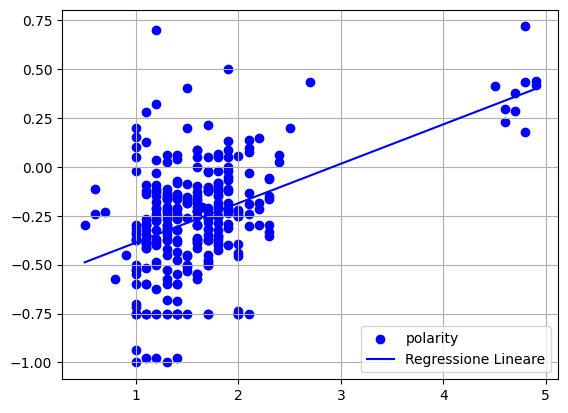

In [35]:
plt.scatter(company_stats['avg_stars'],company_stats['polarity'], label = 'polarity', color='blue', marker='o')
plt.plot(X, valori_previsti, color='blue', label='Regressione Lineare')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
data.head(20)

,company,description,stars,reviews,job_title,clean_review,subjectivity,polarity,vader_polarity,compund,neg,pos
257,StyleShoes,A shoe manufacturing company. Their team inclu...,4.9,They manufacture stylish and comfortable shoes...,Job Title: Footwear Designer\n\nJob Descriptio...,they manufacture stylish comfortable shoes exc...,0.933333,0.633333,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.7906,0.0,0.538
258,StyleShoes,A shoe manufacturing company. Their team inclu...,4.9,They manufacture stylish and comfortable shoes...,Job Title - Shoe Designer\n\nJob Description -...,they manufacture stylish comfortable shoes exc...,0.933333,0.633333,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.7906,0.0,0.538
268,StyleShoes,A shoe manufacturing company. Their team inclu...,4.9,They manufacture stylish and comfortable shoes...,Shoe Designer - Seeking a creative and talente...,they manufacture stylish comfortable shoes exc...,0.933333,0.633333,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.7906,0.0,0.538
267,StyleShoes,A shoe manufacturing company. Their team inclu...,4.9,They manufacture stylish and comfortable shoes...,Product Designer - Join our team of remarkable...,they manufacture stylish comfortable shoes exc...,0.933333,0.633333,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.7906,0.0,0.538
266,StyleShoes,A shoe manufacturing company. Their team inclu...,4.9,They manufacture stylish and comfortable shoes...,Job Title: Footwear Designer\n\nJob Descriptio...,they manufacture stylish comfortable shoes exc...,0.933333,0.633333,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.7906,0.0,0.538
265,StyleShoes,A shoe manufacturing company. Their team inclu...,4.9,They manufacture stylish and comfortable shoes...,Fashion Footwear Designer - Seeking a creative...,they manufacture stylish comfortable shoes exc...,0.933333,0.633333,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.7906,0.0,0.538
264,StyleShoes,A shoe manufacturing company. Their team inclu...,4.9,They manufacture stylish and comfortable shoes...,Job Title: Experienced Shoe Designer\n\nJob De...,they manufacture stylish comfortable shoes exc...,0.933333,0.633333,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.7906,0.0,0.538
263,StyleShoes,A shoe manufacturing company. Their team inclu...,4.9,They manufacture stylish and comfortable shoes...,Job Title: Footwear Designer \n\nJob Descripti...,they manufacture stylish comfortable shoes exc...,0.933333,0.633333,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.7906,0.0,0.538
262,StyleShoes,A shoe manufacturing company. Their team inclu...,4.9,They manufacture stylish and comfortable shoes...,Job Title: Senior Shoe Designer\n\nJob Descrip...,they manufacture stylish comfortable shoes exc...,0.933333,0.633333,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.7906,0.0,0.538
261,StyleShoes,A shoe manufacturing company. Their team inclu...,4.9,They manufacture stylish and comfortable shoes...,Job Title: Footwear Designer\n\nJob Descriptio...,they manufacture stylish comfortable shoes exc...,0.933333,0.633333,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.7906,0.0,0.538


In [70]:
model = LinearRegression()
X = np.array(company_stats['avg_stars'])
Y = np.array(company_stats['polarity'])
model.fit(X.reshape(-1, 1), Y)
intercetta = model.intercept_
coeff_angolare = model.coef_[0]
valori_previsti = model.predict(X.reshape(-1, 1))
# Calcolare il MSE
mse = mean_squared_error(Y, valori_previsti)
# Calcolare il RMSE
rmse = np.sqrt(mse)
# Calcolare il MAE
mae = mean_absolute_error(Y, valori_previsti)
# Calcolare l'R quadro
r2 = r2_score(Y, valori_previsti)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 0.06278344347293088
RMSE: 0.2505662456775271
MAE: 0.1864732701264302
R^2: 0.23035156888537223


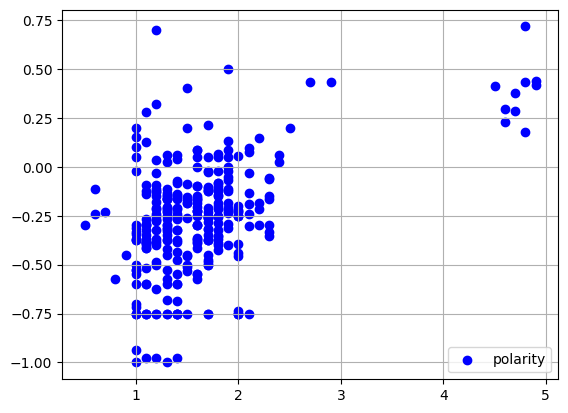

In [71]:
plt.scatter(data['stars'],data['polarity'], label = 'polarity', color='blue', marker='o')
#plt.plot(X, valori_previsti, color='blue', label='Regressione Lineare')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
fig = px.scatter(data, x="stars", y="polarity", color='polarity', marginal_x="histogram")
fig['data'][1].marker.color = 'rgba(246, 78, 139, 0.6)'  # Cambia 'desired-color' con il tuo colore preferito
fig.data[1].marker.line.color = 'rgba(246, 78, 139, 1.0)'  # Sostituisci con il colore desiderato
fig.data[1].marker.line.width = 3

# Per cambiare la label dell'asse x dell'istogramma:
fig.layout.yaxis2.title.text = 'Stars freq'
fig.show()

# VADER

In [11]:
sid_obj = SentimentIntensityAnalyzer()

In [12]:
data['vader_polarity'] = data['review'].apply(sid_obj.polarity_scores)

In [13]:
data['compund'] = data['vader_polarity'].apply(lambda x : x['compound'])

In [14]:
data['neg'] = data['vader_polarity'].apply(lambda x : x['neg'])

In [15]:
data['pos'] = data['vader_polarity'].apply(lambda x : x['pos'])

In [16]:
data.head()

,company,stars,review,review len,vader_polarity,compund,neg,pos
14,AstroBrew Coffee,4.9,AstroBrew Coffee has been consistently impress...,209,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.9477,0.000,0.398
10,Globex Corporation,4.9,Outstanding service and innovative solutions h...,194,"{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'comp...",0.9062,0.000,0.366
40,GourmetGalaxy Restaurants,4.8,"The atmosphere at GourmetGalaxy is unmatched, ...",207,"{'neg': 0.037, 'neu': 0.771, 'pos': 0.191, 'co...",0.7506,0.037,0.191
5,BrightPath Tutoring,4.8,The services provided by BrightPath Tutoring w...,171,"{'neg': 0.055, 'neu': 0.649, 'pos': 0.296, 'co...",0.8318,0.055,0.296
293,VistaVoyage Tours,4.8,Our experience with VistaVoyage Tours was outs...,218,"{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",0.7644,0.000,0.180


In [17]:
company_stats = data.groupby('company').agg({'stars':'mean', 'polarity':'mean','subjectivity':'mean', 'compund':'mean',
                                            'pos':'mean','neg':'mean'})
company_stats.rename(columns = {'stars': 'avg_stars'}, inplace=True)
company_stats.reset_index(inplace=True)

KeyError: "Column(s) ['polarity', 'subjectivity'] do not exist"

In [80]:
company_stats.head(1)

,company,avg_stars,polarity,subjectivity,compund,pos,neg
0,AeroDynamic Drones,1.6,-0.368333,0.498333,-0.8268,0.065,0.289


In [81]:
model = LinearRegression()
X = np.array(company_stats['avg_stars'])
Y = np.array(company_stats['compund'])
model.fit(X.reshape(-1, 1), Y)
intercetta = model.intercept_
coeff_angolare = model.coef_[0]
valori_previsti = model.predict(X.reshape(-1, 1))
# Calcolare il MSE
mse = mean_squared_error(Y, valori_previsti)
# Calcolare il RMSE
rmse = np.sqrt(mse)
# Calcolare il MAE
mae = mean_absolute_error(Y, valori_previsti)
# Calcolare l'R quadro
r2 = r2_score(Y, valori_previsti)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 0.1917102819311037
RMSE: 0.4378473271941987
MAE: 0.35235321486639304
R^2: 0.15286270540951952


In [82]:
X = np.array(company_stats['avg_stars'])
Y_pos = np.array(company_stats['pos'])
model.fit(X.reshape(-1, 1), Y)
intercetta_pos = model.intercept_
coeff_angolare_pos = model.coef_[0]
valori_previsti_pos = model.predict(X.reshape(-1, 1))

# Calcolare il MSE
mse_pos = mean_squared_error(Y_pos, valori_previsti_pos)
# Calcolare il RMSE
rmse_pos = np.sqrt(mse_pos)
# Calcolare il MAE
mae_pos = mean_absolute_error(Y_pos, valori_previsti_pos)
# Calcolare l'R quadro
r2_pos = r2_score(Y_pos, valori_previsti_pos)

print(f'MSE: {mse_pos}')
print(f'RMSE: {rmse_pos}')
print(f'MAE: {mae_pos}')
print(f'R^2: {r2_pos}')

MSE: 0.19775763050308953
RMSE: 0.44469948336274184
MAE: 0.4261857500012207
R^2: -28.013807004242334


In [83]:
X = np.array(company_stats['avg_stars'])
Y_neg = np.array(company_stats['neg'])
model.fit(X.reshape(-1, 1), Y_neg)
intercetta_neg = model.intercept_
coeff_angolare_neg = model.coef_[0]
valori_previsti_neg = model.predict(X.reshape(-1, 1))

# Calcolare il MSE
mse_neg = mean_squared_error(Y_neg, valori_previsti_neg)
# Calcolare il RMSE
rmse_neg = np.sqrt(mse_neg)
# Calcolare il MAE
mae_neg = mean_absolute_error(Y_neg, valori_previsti_neg)
# Calcolare l'R quadro
r2_neg = r2_score(Y_neg, valori_previsti_neg)

print(f'MSE: {mse_neg}')
print(f'RMSE: {rmse_neg}')
print(f'MAE: {mae_neg}')
print(f'R^2: {r2_neg}')

MSE: 0.0064372866225494265
RMSE: 0.0802327029492926
MAE: 0.06470653328371978
R^2: 0.1536591664395177


In [122]:
company_stats.head(1)

,company,openings,avg_stars,polarity,subjectivity,compund,pos,neg
0,AquaFlow,12,2.9,0.25,0.416667,0.5927,0.259,0.0


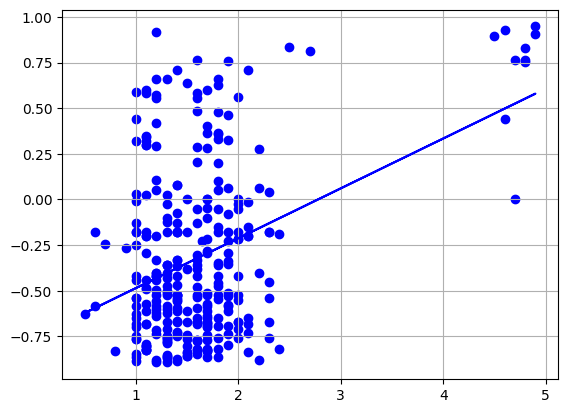

In [85]:
plt.scatter(company_stats['avg_stars'],company_stats['compund'], label = 'polarity', color='blue', marker='o')
plt.plot(X, valori_previsti, color='blue', label='Regressione Lineare')
plt.grid(True)

In [52]:

fig = px.scatter(data, x="stars", y="compund", color='compund', marginal_x="histogram")
fig['data'][1].marker.color = 'rgba(246, 78, 139, 0.6)'  # Cambia 'desired-color' con il tuo colore preferito
fig.data[1].marker.line.color = 'rgba(246, 78, 139, 1.0)'  # Sostituisci con il colore desiderato
fig.data[1].marker.line.width = 3

# Per cambiare la label dell'asse x dell'istogramma:
fig.layout.yaxis2.title.text = 'Stars freq'
fig.show()

In [36]:
data[data['compund'] < 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 129 to 262
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               238 non-null    object 
 1   stars                 238 non-null    float64
 2   review                238 non-null    object 
 3   review len            238 non-null    int64  
 4   vader_polarity        238 non-null    object 
 5   compund               238 non-null    float64
 6   neg                   238 non-null    float64
 7   pos                   238 non-null    float64
 8   compound stars ratio  238 non-null    float64
 9   clean_review          238 non-null    object 
 10  subjectivity          238 non-null    float64
 11  polarity              238 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 24.2+ KB


In [37]:
data[data['polarity'] < 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 230 to 262
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               264 non-null    object 
 1   stars                 264 non-null    float64
 2   review                264 non-null    object 
 3   review len            264 non-null    int64  
 4   vader_polarity        264 non-null    object 
 5   compund               264 non-null    float64
 6   neg                   264 non-null    float64
 7   pos                   264 non-null    float64
 8   compound stars ratio  264 non-null    float64
 9   clean_review          264 non-null    object 
 10  subjectivity          264 non-null    float64
 11  polarity              264 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 26.8+ KB


In [27]:
data['compound stars ratio'] =  (data['compund']/5)*2-1/data['stars']

In [29]:
data['compound stars ratio'].sum()/len(data)

-0.8184774999068994

In [38]:
data['polarity stars ratio'] =  (data['polarity']/5)*2-1/data['stars']

In [39]:
data['polarity stars ratio'].sum()/len(data)

-0.7965332790754164